## Loading the dataset using Kaggle API


In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
!kaggle datasets download -d hamzahabib47/brain-cancer-detection-mri-images

Dataset URL: https://www.kaggle.com/datasets/hamzahabib47/brain-cancer-detection-mri-images
License(s): CC0-1.0
... resuming from 14547224 bytes (0 bytes left) ...
416 - Requested range not satisfiable


In [3]:
# unzipping the file and extracting dataset
from zipfile import ZipFile

fn = "brain-cancer-detection-mri-images.zip"
with ZipFile(fn, 'r') as zip:
    zip.extractall()
    print("done")

done


## Importing necessary libraries

In [4]:
import tensorflow as tf
import os,glob
import cv2 as cv
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [10]:
# reading all the data in the dataset image by image
data_dir = 'Dataset'
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        img = cv.imread(os.path.join(data_dir, image_class, image))

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 800 files belonging to 2 classes.


In [12]:
# iterating through the tensorflow dataset and returning as numpy arrays
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

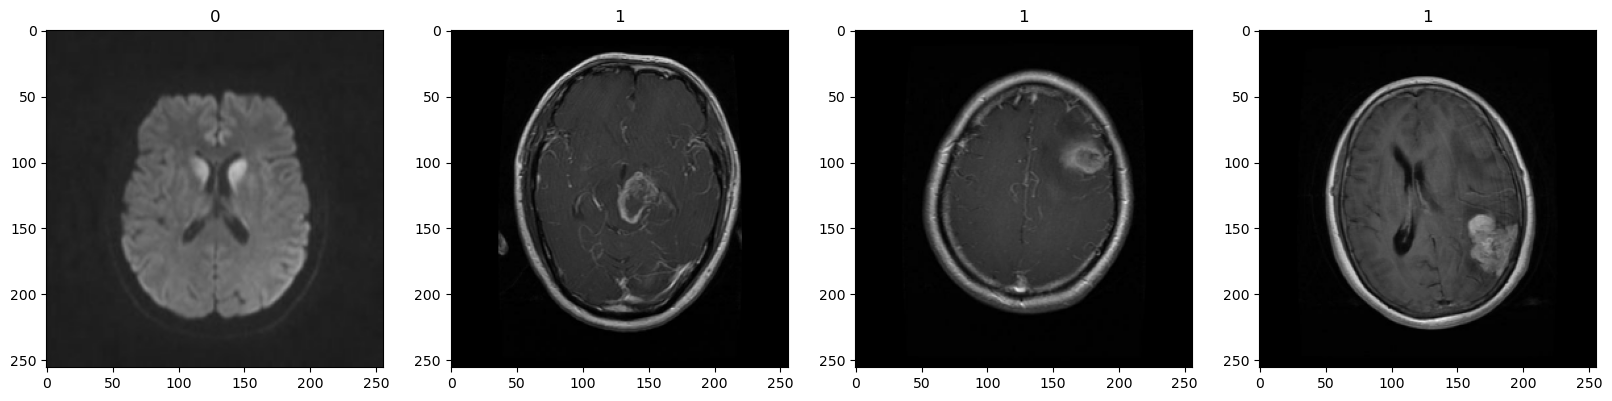

In [13]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing data 

### Scaling of data

In [14]:
# apply changes for normalisation of each element of dataset
data = data.map(lambda x,y:(x/255, y))

In [15]:
# image dataset turned into numpy array 
data.as_numpy_iterator().next()

(array([[[[0.03137255, 0.03137255, 0.03137255],
          [0.03137255, 0.03137255, 0.03137255],
          [0.03137255, 0.03137255, 0.03137255],
          ...,
          [0.02372855, 0.02372855, 0.02372855],
          [0.02372855, 0.02372855, 0.02372855],
          [0.02372855, 0.02372855, 0.02372855]],
 
         [[0.03137255, 0.03137255, 0.03137255],
          [0.03137255, 0.03137255, 0.03137255],
          [0.03137255, 0.03137255, 0.03137255],
          ...,
          [0.02804841, 0.02804841, 0.02804841],
          [0.02804841, 0.02804841, 0.02804841],
          [0.02804841, 0.02804841, 0.02804841]],
 
         [[0.03137255, 0.03137255, 0.03137255],
          [0.03137255, 0.03137255, 0.03137255],
          [0.03137255, 0.03137255, 0.03137255],
          ...,
          [0.03236826, 0.03236826, 0.03236826],
          [0.03236826, 0.03236826, 0.03236826],
          [0.03236826, 0.03236826, 0.03236826]],
 
         ...,
 
         [[0.03529412, 0.03529412, 0.03529412],
          [0.03529

### Splitting of data into training, validation and testing batches


In [16]:
len(data)

25

In [17]:
train_size = int(len(data)*.70)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.10)
train_size+val_size+test_size

25

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Building Deep Learning model

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense,MaxPooling2D, Dense, Flatten

In [21]:
# creating an instance of the sequential model in the 'model' variable
model = Sequential()

# adding convolution layer 1 into the model with 16 filters, (3,3) as the shape of the filter and 1 as the stride. Using Rectified Linear Unit activation function
model.add(Conv2D(16, (3,3), 1, activation= 'relu', input_shape=(256,256,3)))
# adding a pooling layer 
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())
 
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [22]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Training The Model 

In [24]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [25]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20


18/18 [==============================] - 3s 125ms/step - loss: 0.5124 - accuracy: 0.7795 - val_loss: 0.3748 - val_accuracy: 0.8500
Epoch 2/20
18/18 [==============================] - 2s 123ms/step - loss: 0.3453 - accuracy: 0.8663 - val_loss: 0.2757 - val_accuracy: 0.8875
Epoch 3/20
18/18 [==============================] - 2s 122ms/step - loss: 0.2648 - accuracy: 0.9028 - val_loss: 0.1926 - val_accuracy: 0.9500
Epoch 4/20
18/18 [==============================] - 2s 122ms/step - loss: 0.1809 - accuracy: 0.9375 - val_loss: 0.1461 - val_accuracy: 0.9312
Epoch 5/20
18/18 [==============================] - 2s 121ms/step - loss: 0.1039 - accuracy: 0.9635 - val_loss: 0.1479 - val_accuracy: 0.9563
Epoch 6/20
18/18 [==============================] - 2s 121ms/step - loss: 0.0944 - accuracy: 0.9688 - val_loss: 0.0678 - val_accuracy: 0.9750
Epoch 7/20
18/18 [==============================] - 2s 121ms/step - loss: 0.0464 - accuracy: 0.9896 - val_loss: 0.0671 - val_accuracy: 0.9875
Epoc

## Plotting The Performance

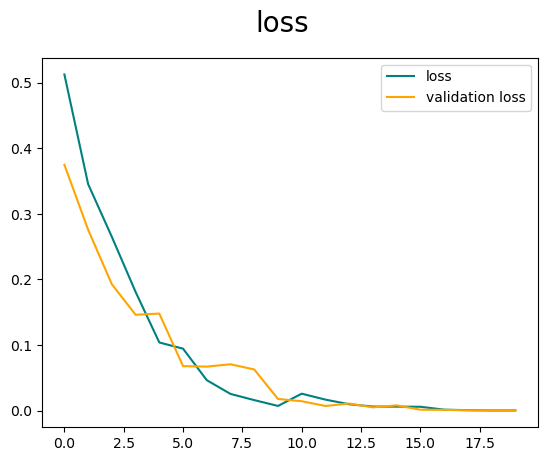

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color= 'teal', label= 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'validation loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

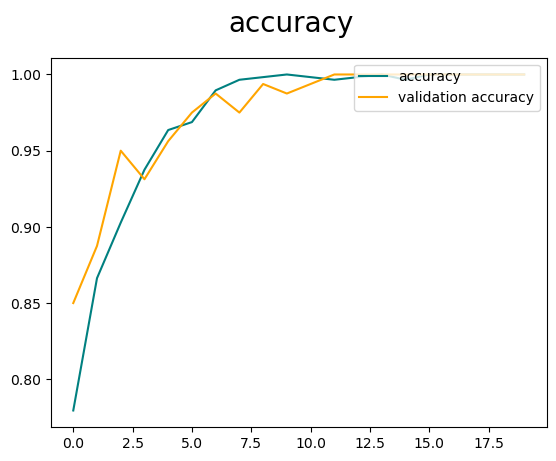

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color= 'teal', label= 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'validation accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

## Evaluating The Peformance

### Evaluate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_hat = model.predict(X)
    precision.update_state(y, y_hat)
    recall.update_state(y, y_hat)
    accuracy.update_state(y, y_hat)

1/1 [==============================] - 0s 39ms/step


In [31]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0
